Trading prediction

Importuri necesare

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

Încărcarea dataset-ului

In [5]:
file_path = "C:\\Users\\Marian.Pop\\Downloads\\ADANIPORTS_minute.csv"
data = pd.read_csv(file_path)

In [7]:
data.head(10)

,date,open,high,low,close,volume
0,2015-02-02 09:15:00,338.85,342.40,338.85,341.40,46482
1,2015-02-02 09:16:00,341.90,343.90,341.35,342.85,45324
2,2015-02-02 09:17:00,342.85,342.85,341.50,342.20,21503
3,2015-02-02 09:18:00,342.20,342.80,342.00,342.55,21984
4,2015-02-02 09:19:00,342.55,342.55,340.40,340.65,14631
5,2015-02-02 09:20:00,340.35,341.00,340.35,340.60,13700
6,2015-02-02 09:21:00,340.65,341.00,338.15,338.45,19259
7,2015-02-02 09:22:00,338.45,338.50,333.00,334.90,25762
8,2015-02-02 09:23:00,334.65,335.65,334.65,335.10,11277
9,2015-02-02 09:24:00,335.10,335.45,334.85,335.10,8075


In [8]:
data.columns = data.columns.str.capitalize()
print(data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [9]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2015-02-02 09:15:00,338.85,342.40,338.85,341.40,46482
1,2015-02-02 09:16:00,341.90,343.90,341.35,342.85,45324
2,2015-02-02 09:17:00,342.85,342.85,341.50,342.20,21503
3,2015-02-02 09:18:00,342.20,342.80,342.00,342.55,21984
4,2015-02-02 09:19:00,342.55,342.55,340.40,340.65,14631


In [10]:
# Data Cleaning and Preprocessing
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d %H:%M:%S')

# Sort by Date
data.sort_values('Date', inplace=True)

# Remove duplicates if any
data.drop_duplicates(inplace=True)

# Handle zero volume rows (optional: drop or replace)
data = data[data['Volume'] > 0]

# Resample to daily data
daily_data = data.set_index('Date').resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).dropna()

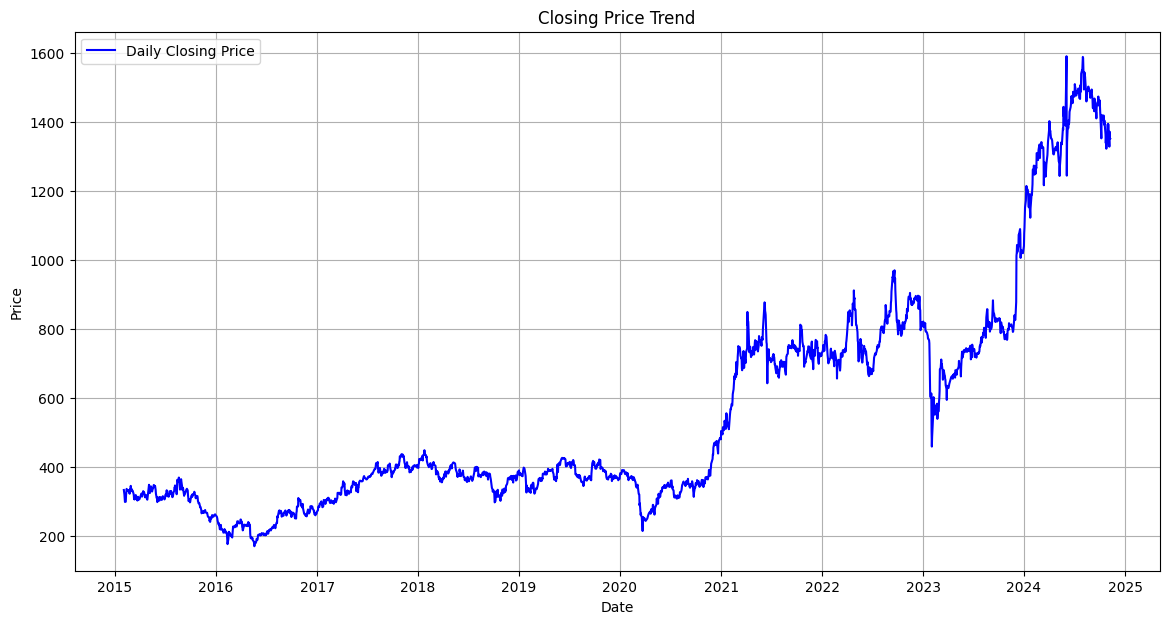

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(daily_data['Close'], label='Daily Closing Price', color='blue')
plt.title('Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

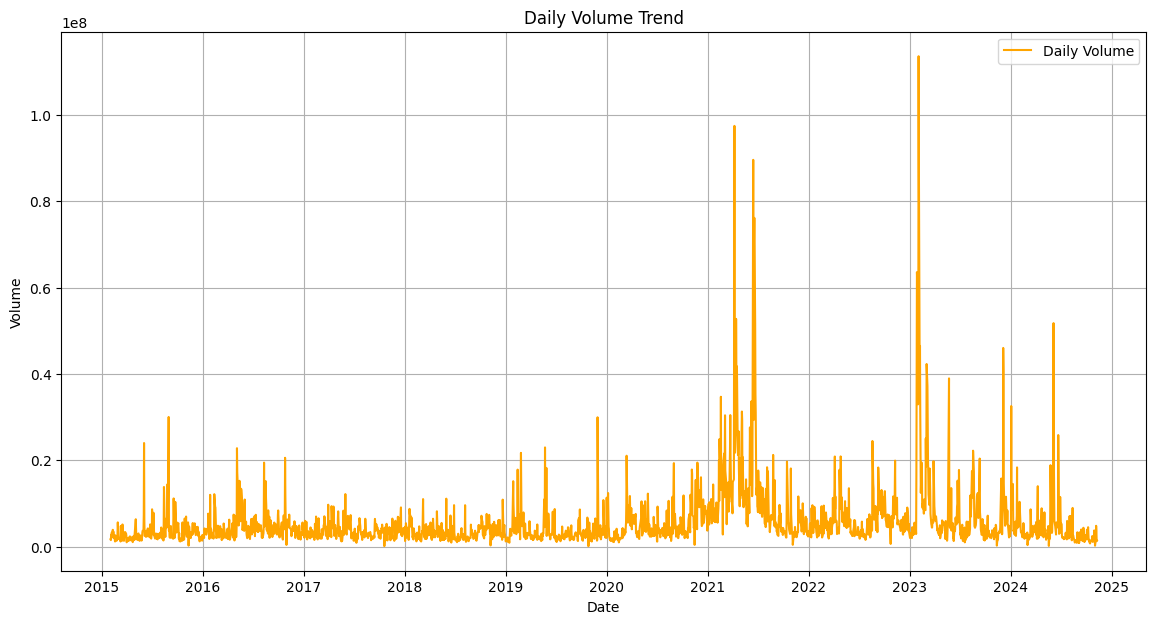

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(daily_data['Volume'], label='Daily Volume', color='orange')
plt.title('Daily Volume Trend')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

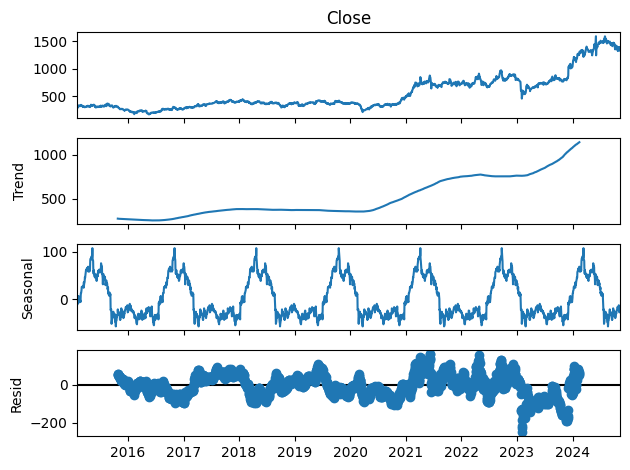

Data cleaned, resampled, and visualized. Saved as 'ADANIPORTS_daily_cleaned.csv'.


In [13]:
decompose_result = seasonal_decompose(daily_data['Close'], model='additive', period=365)

decompose_result.plot()
plt.show()

# Save cleaned and resampled data
daily_data.to_csv('ADANIPORTS_daily_cleaned.csv')

print("Data cleaned, resampled, and visualized. Saved as 'ADANIPORTS_daily_cleaned.csv'.")